In [1]:
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt 

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
   'C:/Users/Awoleye/Downloads/archive (33)/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    'C:/Users/Awoleye/Downloads/archive (33)/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])   

C:\Users\Awoleye\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    train_data,
    steps_per_epoch=100,
    epochs=100,
    validation_data=test_data,
    validation_steps=25
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9273 - loss: 0.1718 - val_accuracy: 0.7214 - val_loss: 0.9581
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.9375 - loss: 0.1604 - val_accuracy: 0.6857 - val_loss: 1.1785
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9437 - loss: 0.1463 - val_accuracy: 0.6714 - val_loss: 1.0777
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9541 - loss: 0.1304 - val_accuracy: 0.6643 - val_loss: 1.0514
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9653 - loss: 0.1161 - val_accuracy: 0.6929 - val_loss: 1.0018
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9528 - loss: 0.1266 - val_accuracy: 0.6429 - val_loss: 1.1762
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.9450 - loss: 0.1384 - val_accuracy: 0.6714 - val_loss: 1.0789
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9824 - loss: 0.0894 - 


KeyboardInterrupt



<function matplotlib.pyplot.show(close=None, block=None)>

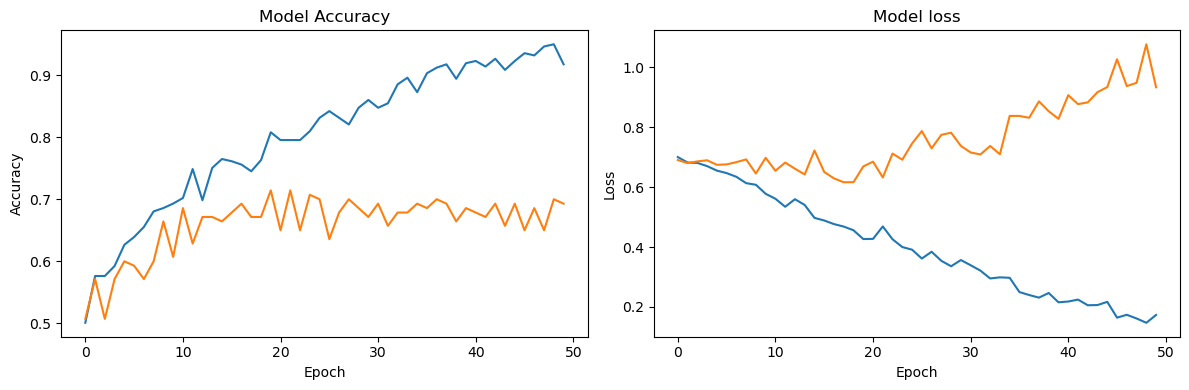

In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show

In [8]:
model.save('cnn.keras')